In [26]:
# Creating train, validation. and test data
import os
import shutil
import pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")


def make_subset(subset_name, start_index, end_index):
    for category in ["cat", "dog"]:
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]

        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)


make_subset("train", 0, 1000)
make_subset("validation", 1000, 1500)
make_subset("test", 1500, 2500)


FileExistsError: [Errno 17] File exists: 'cats_vs_dogs_small/train/cat'

In [27]:
# Training
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))

x = layers.Rescaling(1.0 / 255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [28]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop", metrics=["accuracy"])

In [29]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", image_size=(180, 180), batch_size=32
)
val_dataset = image_dataset_from_directory(
    new_base_dir / "validation", image_size=(180, 180), batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test", image_size=(180, 180), batch_size=32
)


Found 2000 files belonging to 2 classes.


Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [30]:
for data_branch, labels_branch in train_dataset:
    print("data batch shape:", data_branch.shape)
    print("labels batch shape:", labels_branch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


2023-07-22 11:36:49.302729: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2000]
	 [[{{node Placeholder/_4}}]]
2023-07-22 11:36:49.302877: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2000]
	 [[{{node Placeholder/_4}}]]


In [31]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras", save_best_only=True, monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=val_dataset,
    callbacks=callbacks,
)


Epoch 1/30
63/63 [==============================] - 1s 10ms/step - loss: 0.6969 - accuracy: 0.5055 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/30


2023-07-22 11:36:51.863531: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1000]
	 [[{{node Placeholder/_0}}]]
2023-07-22 11:36:51.863664: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1000]
	 [[{{node Placeholder/_4}}]]


63/63 [==============================] - 1s 9ms/step - loss: 0.6894 - accuracy: 0.5470 - val_loss: 0.6663 - val_accuracy: 0.5800
Epoch 3/30
63/63 [==============================] - 1s 9ms/step - loss: 0.6762 - accuracy: 0.6060 - val_loss: 0.6286 - val_accuracy: 0.6450
Epoch 4/30
63/63 [==============================] - 1s 9ms/step - loss: 0.6390 - accuracy: 0.6295 - val_loss: 0.6858 - val_accuracy: 0.5860
Epoch 5/30
63/63 [==============================] - 1s 9ms/step - loss: 0.5984 - accuracy: 0.6735 - val_loss: 0.6329 - val_accuracy: 0.6510
Epoch 6/30
63/63 [==============================] - 1s 9ms/step - loss: 0.5682 - accuracy: 0.7030 - val_loss: 0.6232 - val_accuracy: 0.6780
Epoch 7/30
63/63 [==============================] - 1s 9ms/step - loss: 0.5421 - accuracy: 0.7255 - val_loss: 0.6649 - val_accuracy: 0.6880
Epoch 8/30
63/63 [==============================] - 1s 9ms/step - loss: 0.5067 - accuracy: 0.7510 - val_loss: 0.5794 - val_accuracy: 0.6970
Epoch 9/30
63/63 [=============

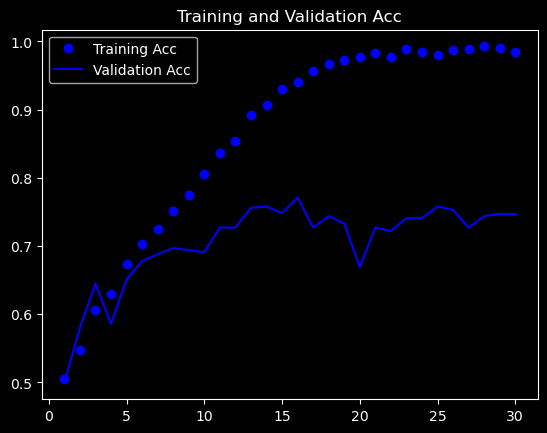

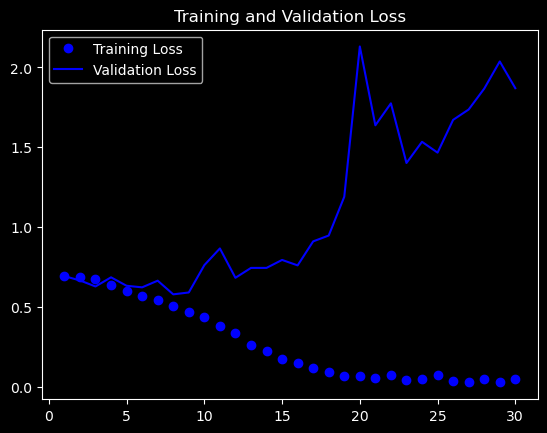

In [32]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training Acc")
plt.plot(epochs, val_accuracy, "b", label="Validation Acc")
plt.title("Training and Validation Acc")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()
# overfitting


In [33]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

27/63 [===========>..................] - ETA: 0s - loss: 0.5957 - accuracy: 0.6991

2023-07-22 11:37:38.151975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2000]
	 [[{{node Placeholder/_0}}]]
2023-07-22 11:37:38.152109: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2000]
	 [[{{node Placeholder/_4}}]]


63/63 [==============================] - 0s 4ms/step - loss: 0.6041 - accuracy: 0.7050
Test accuracy: 0.705


In [34]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

2023-07-22 11:37:42.453452: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2000]
	 [[{{node Placeholder/_0}}]]
2023-07-22 11:37:42.453706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2000]
	 [[{{node Placeholder/_0}}]]


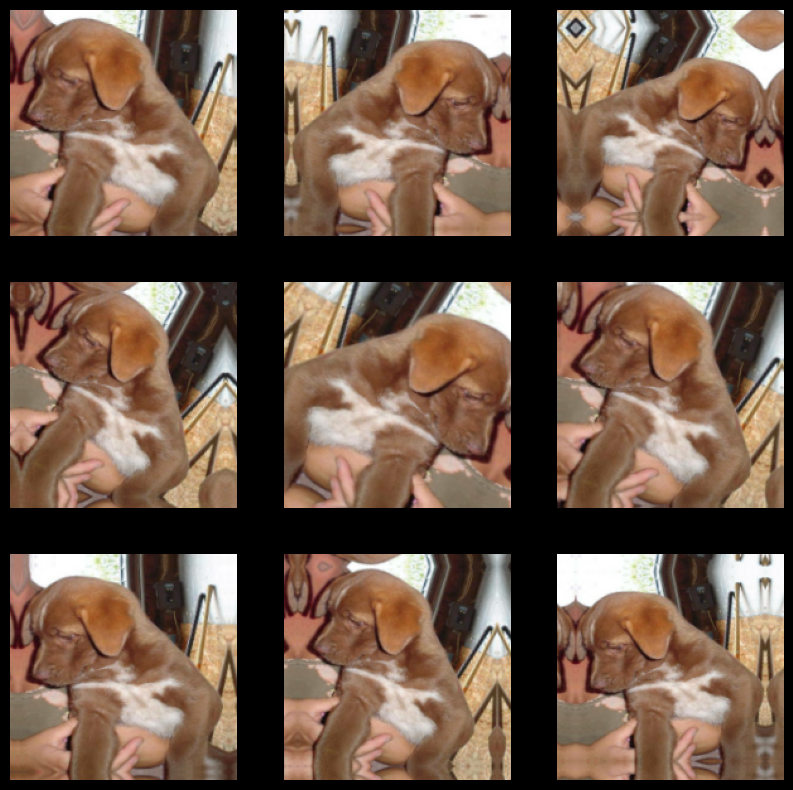

In [35]:
plt.figure(figsize=(10, 10))
for images, _ in test_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [37]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1.0 / 255)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop", metrics=["accuracy"])

In [41]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=val_dataset,
    callbacks=callbacks,
)


Epoch 1/100
63/63 [==============================] - 1s 10ms/step - loss: 0.1621 - accuracy: 0.9375 - val_loss: 1.3011 - val_accuracy: 0.7720
Epoch 2/100
63/63 [==============================] - 1s 10ms/step - loss: 0.2144 - accuracy: 0.9315 - val_loss: 0.7997 - val_accuracy: 0.8330
Epoch 3/100
63/63 [==============================] - 1s 10ms/step - loss: 0.1574 - accuracy: 0.9450 - val_loss: 0.8090 - val_accuracy: 0.8330
Epoch 4/100
63/63 [==============================] - 1s 10ms/step - loss: 0.1496 - accuracy: 0.9450 - val_loss: 0.8731 - val_accuracy: 0.8310
Epoch 5/100
63/63 [==============================] - 1s 10ms/step - loss: 0.1721 - accuracy: 0.9405 - val_loss: 1.0226 - val_accuracy: 0.8310
Epoch 6/100
63/63 [==============================] - 1s 10ms/step - loss: 0.1582 - accuracy: 0.9500 - val_loss: 0.7271 - val_accuracy: 0.8520
Epoch 7/100
63/63 [==============================] - 1s 10ms/step - loss: 0.1503 - accuracy: 0.9440 - val_loss: 0.7480 - val_accuracy: 0.8610
Epoch 

In [42]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 0s 4ms/step - loss: 0.7666 - accuracy: 0.8530
Test accuracy: 0.853


## Pretrained model


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


In [1]:
# eeeeeeeeeeee
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet", include_top=False, input_shape=(180, 180, 3)
)

NameError: name 'keras' is not defined

In [ ]:
import numpy as np


def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)


train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(val_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)
